# Equipo 4 Presenta: Semana Tec TC1002S
# Análisis de Datos usando Python y sus librerías

## Introducción
Durante el transcurso de la semana, los integrantes del equipo 4 realizaron varias actividades con el material visto en clase para poder gráficar e interpretar datos de reportes estadísticos. El reporte podía ser cualquiera, con el solo hecho de que fuese uno público. El equipo opto analizar u reporte hecho por el Gobierno Federal sobre los casos de desaparición en México. La gráfica contiene alrededor de 36,000 registros de todas las entitades de la repúblia.

Algunos valores o datos se eleiminaron ya que no tenían relevancia al estudio, simplemente ayudaban especificar algunoa atributoss de los desaparecidos. Otros datos que se hubiese haber gustado tener estaban incompletos. Datos como "Si la víctima padecía de alguna discapacidad" o "Etnia", que podría dar a conocer si existe algun problema de descriminación en la nación, se encontraban mayormente vacíos en la tabla; la ayoría de los registros tenían estos dos factores como "NO ESPECIFICADO" para etnias y discapacidades,  o "No tiene" en el caso de las discapacidades. Lamentablemente, eso significa que se vio necesario eliminar esas colunas de la tabla inicial, para enfocarse en los datos que sí tenemos disponbles 

A continuación, se presentarán las diferentes actividades realizadas para el análisis de datos; además, se dará o se tratará de posibles razones o al menos se plasmará la interpretación de los datos y por ende lo que significan para el país y su seguridad.

## Día 1 - Repositorio

Este día fue uno más sencillo, solo se creo un repositorio en GitHub, donde se puede hallar este notebook además de otros documentos del equipo o de la clase que sirvieron de apoyo. Este originó de un clone del repositorio del profesor.

Para ver el repositorio del equipo, se puede accesar con la siguiente liga: https://github.com/estebansanch/TC1002S

## Día 2 - Estadísticas Descriptivas

En este día se trabajo en Python, usando la librería de pandas, para leer el archivo csv y poder extraer información más simplificada pero pertinenete del documento. En este caso, se determino la media (promedio), la mediana, y la moda de cada columna o variable en el reporte. 

Por cierto, cabe mencioar que el reporte se modificó para que fuese más compatible con Python y el resto del código. Se eliminaron una gran cantidad de variables que no eran de suma importancia, o que aun siendo importante no tenían mucha información registrada debido a su confidencialidad. Esto reduce el reporte a las siguientes variables: 

1. Hora (Tiempo de desaparición)
2. Entidad (Estado donde se vió por última vez)
3. Municipio (Región estatal donde se vió por última vez)
4. Edad (Edad de quien se registro como desaparecido)
5. Estatura (Altura del desaparecide).
6. Sexo (Identidad En cuestiones de Hombre y Mujer de la víctima).

Además, se sacaron se describieron las varibales de Estatura y Edad, principalmente porque eran las únicas variables que usaban números como enteros y floats, por lo que sí se podrían describir los hallazgos matemáticamente. 

Aquí abajo lo primero que se hace es establecer las librerías que se usarán no solo para esta sección, si no para todo el documento.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Después, se lee el documento y se buscar contar la cantidad de indices que hay, y sacar la media, mediana y moda del reporte. Nota como solo la Edad y Estatura tienen media y mediana, debido a que estos son los únicos con valores numéricos matemáticos.

In [3]:
df=pd.read_csv('RNPEDFC.csv')
print('Cantidad de renglones ',len(df.index))
print('Promedio ',df.mean())
print('Mediana ',df.median())
print('Moda ',df.mode())

Cantidad de renglones  36265
Promedio  Estatura     1.638859
Edad        30.801655
dtype: float64
Mediana  Estatura     1.65
Edad        28.00
dtype: float64
Moda         Hora     Entidad Municipioenqueselevioporultimavez  Estatura    Sexo  \
0  12:00:PM  TAMAULIPAS                         MATAMOROS       1.7  HOMBRE   

   Edad  
0  16.0  


La información que se generó post código ya se puede interpretar. Al hacerlo, se aprenden de varios datos interesantes. Tamaulipas es la entidad federal con más casos registrados, es justo decir entonces que es el estado con mayor desapariciones y es inseguro. Matamoros es la ciudad con más desapariciones y por ende lo hace increíblemente peligroso. La estatura común de las víctimas es de 1.7, la mayoría de los registrados son hombres y la mayoría de las víctimas tenían 16 años al esaparecer.

Finalmente, se lee el reporte de nuevo y ahora se le pide al programa que escriba los indices númericos de la mejor forma posible.

In [24]:
df=pd.read_csv('RNPEDFC.csv')
print('Cantidad de renglones ',len(df.index))
print(df.describe())

Cantidad de renglones  36265
           Estatura          Edad
count  25257.000000  33109.000000
mean       1.638859     30.801655
std        0.162449     15.025777
min        0.300000      1.000000
25%        1.600000     20.000000
50%        1.650000     28.000000
75%        1.720000     39.000000
max        2.040000    103.000000


Nota arriba como aún con 36,265 registros, solo se contarón 25,257 registros de altura y 33,109 registros de edades. Estó se debe a que para que el código funcione, se cambió "No Especificado" (lo que originalmete decía en la tabla para aquello que no tienen edad reportada por "null". "Null" le dice a Python que se salte a si mismo en ese momento de contar los indices y de guardar la ifnromación. Esencialmente, solo se usan los 25,257 registros documentados de estatura y los 33,109 registros de edad para deteerminar la media, el estándar, el mínimo, máximo, etc.

## Día 3 - Visualzación del reporte e Interpretación de ella

En este día se presentó la visualización de los datos en el reporte, a través de gráficas que se crearon usando las librerías de Seaborn, Matplolib, y Numpy.

ADVERTENCIA: Los hallazgos que se hicieron por medio de estas gráficas pueden llegar a ser muy pesados para algunas personas. El tema que tratan es uno muy sensible y de suma importancia. La interpretación que se realiza es una que se hizo con mucha consideración y se le invita a deducir su propia interpretación de la información. Lee a su propia discreción.

### Boxplots

#### Creación de diagrama

Lo primero que se observa aquí es que se le pide al programa que lea de nuevo el documento. Se crea una figura de tamaño 10 x 10 en donde se graficará el diagrama de caja. La forma en la que funciona es que se segmenta un punto donde se encuentran las edades más comunes y afuea del segmento se marcan los putos más extremos, excepciones del reporte.

En este diagrama, se observa cómo la edad más común parece ser una de entre 20 y 40 años de edad. 

df=pd.read_csv('RNPEDFC.csv')

fig = plt.figure(figsize=(10,10))
sns.boxplot(data=df, x = 'Edad')

plt.title("Boxplot de Edades")

#### Interpretción

Aquí se puede interpretar como que la mayoría de los desaparecidos son de las edades entre 20 y 40, lo cuál dice que en México muchoas que se desaparecen probablemnte son por motivos bélicos.

#### Creación de diagrama

Este usa el reporte abierto en elesquema anterior y realiza la misma acción, solo que utiliza la estatura.

Text(0.5, 1.0, 'Boxplot de Estatura')

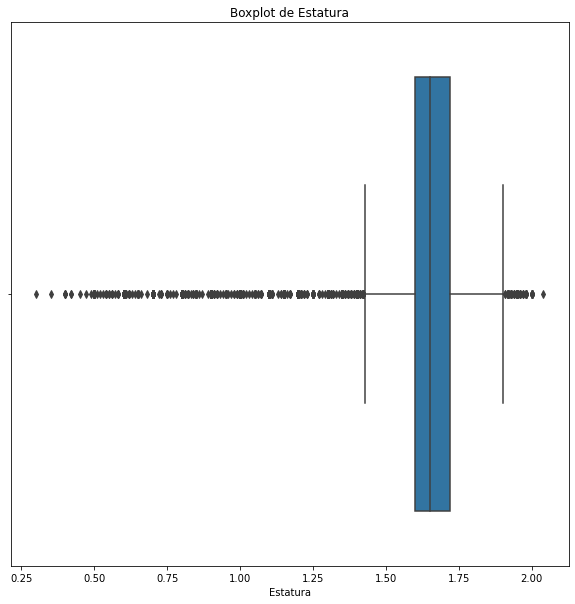

In [28]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(data=df, x = 'Estatura')

plt.title("Boxplot de Estatura")

#### Interpretación

La interpretación es más sencilla aquí. Las estaturas comunes de desaparición coincide con la estatura promedio mexicano. Lo que sí asombra es que tanta gente más pequeña han desaparecido, se puede asumir que estos son infantes o menores de edad. lo cuál asusta demasiado.

### Heatmap

#### Creación de Heatmap

Un heatmap representa el grado de correlación que hay entre un dato y otro o varios. En este caso, se busca explorar a correlación entre edad y estatura. Esta información realmente no tiene tanto relevancia a la información que realmente sea de interés común, pero el programa decide que correlacionar y decidió los únicos valores numéricos que habían. 

Text(0.5, 1.0, 'Heatmap de Correlación Edades / Estatura')

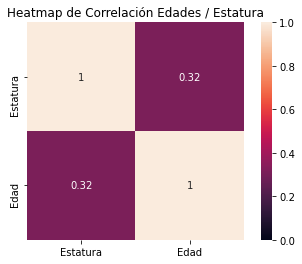

In [29]:
corr=df.corr()
sns.heatmap(data=corr, vmin = 0, vmax = 1, annot = True, square = True)
plt.title("Heatmap de Correlación Edades / Estatura")

#### Interpretación

La interpretación es sencilla, no existe una firme correlación entre la edad y la estatura en el reporte. El grado es solo de 0.32 puntos.

### Histogramas

#### Creación de diagramas

Un histograma compara un valor sobre otro en el lapso del reporte y se puede separar por un tercer valor para diferenciarlos y compararlo con otras posibles resultados de ese valor. Se realizaron dos histogramas: 
- Uno donde se compara la cantidad de personas desaparecidas por edades y se comparan los sexos. 
- En el otro historgrama, se comparan los mismos datos, pero se reemplaza la edad por la estatura.

Se presentarán ahora los datos hallados y su interpretación.

Text(0.5, 1.0, 'Histograma de Edades y Sexo')

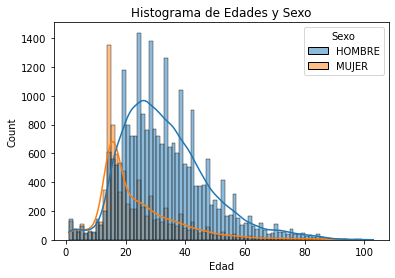

In [30]:
sns.histplot(data=df, x='Edad', hue = 'Sexo', bins = 80, kde=True)

plt.title("Histograma de Edades y Sexo")

#### Interpretación

Aquí se puede observar la frecuencia de las edades registradas en el reporte, y estas son separadas por el sexo. Se observa que en hombres, las edades más frecuentes de desaparición son entre los 21 y los 40, en especial a la edad de 25. Este rango parece ser debido a la actividad criminal que existe en el país, y muchos de estos posiblemente se les podría atribuir a esta situación.

En donde la interpretación se pone más turbió es en el de mujeres. La edad más común en la que se reportan mujeres es de alrededor de 16 años. Esto es muy preocupante, ya que indica cómo a la mujer se le esta abusando y maltratando en una edad muy joven, que la lleg a afectar de por vida. Revela una realidad muy triste de México: A la mujer todavía no se le ve como una persona individua en muchas partes de la república, muchos creen que pueden hacer lo que quieran con ellas cuando son jovenes. Es bastante alarmante saber que la adolescencia es e periodo más peligroso para mujeres. Se espera que en un futuro eso no sea el caso.

Text(0.5, 1.0, 'Histograma de Estaturas y Sexo')

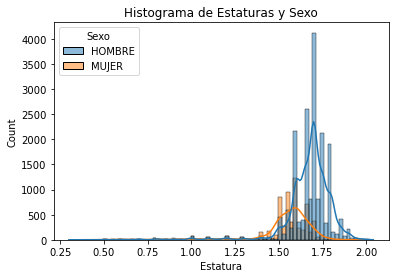

In [31]:
sns.histplot(data=df, x='Estatura', hue = 'Sexo', bins = 80, kde=True)

plt.title("Histograma de Estaturas y Sexo")

#### Interpretación

Afortunadamente este reporte no revela na turbio ni trágico, pero sí coincide con la estatura promedio de los mexicanos y mexicanas. 

### Diagrama de Dispersión

#### Creación de diagrama

Este diagrama es uno que  compara la cantidad de disapariciones por edad en los diferentes estados y los grafica en puntos indicando la presencia de al menos un caso regisrado. Estos también estan separados por hombre y mujer para ver cuál fue el sexo más comunmente desaparecido en esa edad en un estado en particular.

Text(0.5, 1.0, 'Dispersión de Edades entre las diferentes Entidades y los Sexos que los representan')

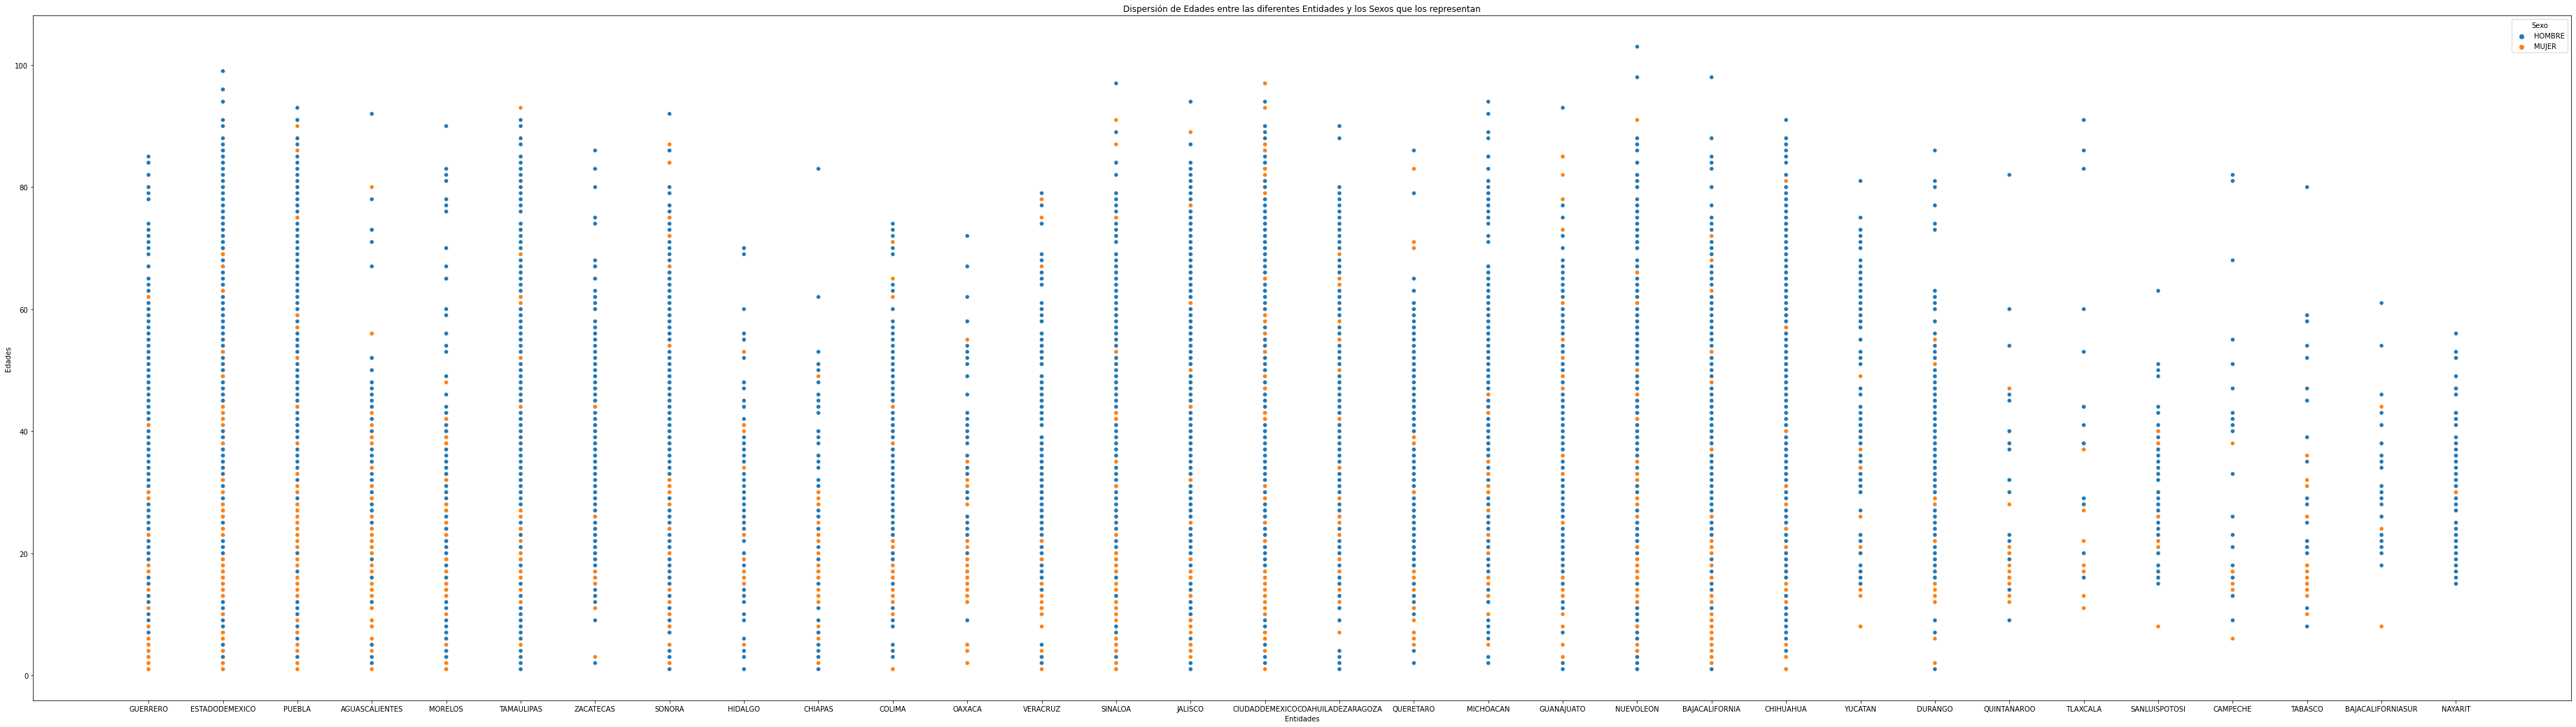

In [32]:
fig = plt.figure(figsize=(65, 18))

# Gráfico scatterplot.
sns.scatterplot(data=df, x ='Entidad', y='Edad', hue='Sexo')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre edad de desaparición por entidad y sexo de desaparecido')
plt.xlabel('Entidades')
plt.ylabel('Edades')

plt.title("Dispersión de Edades entre las diferentes Entidades y los Sexos que los representan")

#### Interpretación

Lo más importante que se puede interpretar y aprender de este diagrama es que sexo se ve más afectado en específicas entidades federales. Entitades como Aguascalientes, Sinaloa, y la Ciudad de México tienen severos problemas de desapariciones de mujeres menores de edad. Oaxaca también lo tiene pero no al mismo grado. En general es un patrón que se ve en casi todas las entidades. También cabe destacar que en todas las entitades, de los 24 para arriba, las víctimas son mayormente hombres. Este diagrama también puede decir la condición en el que se encuentra una entidad. Zacatecas por ejemplo, no tiene muchos reportes de chicas desaparecidos, y casi no tiene reportes de menores de edad, lo que indica que el problema en Zacatecas es mayormente uno de conflictos bélicos regionales.

## Día 3.5 - K Means

En clase, tambié se vio un poco de los K means, que es una forma de gráficar la información en cluster. Esencialmente, se separa la información en grupos, y e grafican todos alrededor del centroide más cecano. Todos aquellos que cruzan a otro cluster se cruzan o se marcan. Primero se debe normalizar la información para poder asignar un grupo, y luego el algoritmo lo va a poder graficar en donde corresponde cada grupo en una función.

In [4]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables a normalizar
numeric_cols = ['Edad', 'Estatura']
X = df.loc[:, numeric_cols]

# Hacemos el escalamiento.
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy. Vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head()

,Edad,Estatura
0,-1.983399,-8.241869
1,-1.983399,-7.934075
2,-1.983399,-7.626280
3,-1.850292,-7.626280
4,-1.783739,-7.626280


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmax   = 8
grupos = range(2, kmax)
wcss   = []
sil_score = []

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_clusters=k, random_state = 47)

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    sil_score.append(silhouette_score(X_norm, clusters))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Aquí el equipo se topó con un problema, las variables son muy grandes para ser normalzadas, y cuenta con NaNs, que entra en conflcito con l afunción. Existe formas de ignorar NaNs. Pero al momento, los métodos que se han utilizado no han sido existosos. Es por eso que lamentablemente no se pudo completar este aspecto del análisis de datos. 